In [3]:
import requests
req = requests.get('https://data.covid19.go.id/public/api/update.json')
print(req)

<Response [200]>


In [4]:
covid_id_raw = req.json()
covid_id_raw

{'data': {'id': 1,
  'jumlah_odp': 5465,
  'jumlah_pdp': 0,
  'total_spesimen': 51210917,
  'total_spesimen_negatif': 41627199},
 'update': {'penambahan': {'jumlah_positif': 400,
   'jumlah_meninggal': 11,
   'jumlah_sembuh': 464,
   'jumlah_dirawat': -75,
   'tanggal': '2021-11-18',
   'created': '2021-11-18 18:23:00'},
  'harian': [{'key_as_string': '2020-03-02T00:00:00.000Z',
    'key': 1583107200000,
    'doc_count': 1,
    'jumlah_meninggal': {'value': 0},
    'jumlah_sembuh': {'value': 0},
    'jumlah_positif': {'value': 2},
    'jumlah_dirawat': {'value': 2},
    'jumlah_positif_kum': {'value': 2},
    'jumlah_sembuh_kum': {'value': 0},
    'jumlah_meninggal_kum': {'value': 0},
    'jumlah_dirawat_kum': {'value': 2}},
   {'key_as_string': '2020-03-03T00:00:00.000Z',
    'key': 1583193600000,
    'doc_count': 1,
    'jumlah_meninggal': {'value': 0},
    'jumlah_sembuh': {'value': 0},
    'jumlah_positif': {'value': 0},
    'jumlah_dirawat': {'value': 0},
    'jumlah_positif_kum':

In [6]:
print(len(covid_id_raw))
print(covid_id_raw.keys())

2
dict_keys(['data', 'update'])


In [14]:
print('Tanggal pembaruan data penambahan COVID-19 : ', covid_id_raw['update']['penambahan']['tanggal'])
print('Jumlah penambahan data positif kasus COVID-19 : ', covid_id_raw['update']['penambahan']['jumlah_positif'])
print('Jumlah penambahan data sembuh kasus COVID-19 : ', covid_id_raw['update']['penambahan']['jumlah_sembuh'])
print('Jumlah penambahan data meninggal kasus COVID-19 : ', covid_id_raw['update']['penambahan']['jumlah_meninggal'])

print('')
print('Jumlah total kasus positif hingga saat ini : ', covid_id_raw['update']['total']['jumlah_positif'])
print('Jumlah total kasus sembuh hingga saat ini : ', covid_id_raw['update']['total']['jumlah_sembuh'])
print('Jumlah total kasus meninggal hingga saat ini : ', covid_id_raw['update']['total']['jumlah_meninggal'])


Tanggal pembaruan data penambahan COVID-19 :  2021-11-18
Jumlah penambahan data positif kasus COVID-19 :  400
Jumlah penambahan data sembuh kasus COVID-19 :  464
Jumlah penambahan data meninggal kasus COVID-19 :  11

Jumlah total kasus positif hingga saat ini :  4252345
Jumlah total kasus sembuh hingga saat ini :  4100321
Jumlah total kasus meninggal hingga saat ini :  143709


In [16]:
req_jatim = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_TIMUR.json')
response = req_jatim.json()
response

{'last_date': '2021-11-18',
 'provinsi': 'JAWA TIMUR',
 'kasus_total': 399050,
 'kasus_tanpa_tgl': 11,
 'kasus_dengan_tgl': 399039,
 'meninggal_persen': 7.436411477258489,
 'meninggal_tanpa_tgl': 33,
 'meninggal_dengan_tgl': 29642,
 'sembuh_persen': 92.497431399574,
 'sembuh_tanpa_tgl': 202,
 'sembuh_dengan_tgl': 368909,
 'list_perkembangan': [{'tanggal': 1584489600000,
   'KASUS': 7,
   'MENINGGAL': 1,
   'SEMBUH': 0,
   'DIRAWAT_OR_ISOLASI': 6,
   'AKUMULASI_KASUS': 7,
   'AKUMULASI_SEMBUH': 0,
   'AKUMULASI_MENINGGAL': 1,
   'AKUMULASI_DIRAWAT_OR_ISOLASI': 6},
  {'tanggal': 1584576000000,
   'KASUS': 3,
   'MENINGGAL': 0,
   'SEMBUH': 0,
   'DIRAWAT_OR_ISOLASI': 3,
   'AKUMULASI_KASUS': 10,
   'AKUMULASI_SEMBUH': 0,
   'AKUMULASI_MENINGGAL': 1,
   'AKUMULASI_DIRAWAT_OR_ISOLASI': 9},
  {'tanggal': 1584662400000,
   'KASUS': 9,
   'MENINGGAL': 0,
   'SEMBUH': 0,
   'DIRAWAT_OR_ISOLASI': 9,
   'AKUMULASI_KASUS': 19,
   'AKUMULASI_SEMBUH': 0,
   'AKUMULASI_MENINGGAL': 1,
   'AKUMULASI_D

In [18]:
print(response.keys())

dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])


In [21]:
print('Tanggal pembaruan data penambahan COVID-19 di Jawa Timur: ', response['last_date'])
print('Jumlah total kasus positif hingga saat ini : ', response['kasus_total'])
print('Persentase kasus sembuh hingga saat ini : ', response['sembuh_persen'])
print('Persentase kasus meninggal hingga saat ini : ', response['meninggal_persen'])


Tanggal pembaruan data penambahan COVID-19 di Jawa Timur:  2021-11-18
Jumlah total kasus positif hingga saat ini :  399050
Persentase kasus sembuh hingga saat ini :  92.497431399574
Persentase kasus meninggal hingga saat ini :  7.436411477258489


In [23]:
import numpy as np
import pandas as pd
covid_jatim = pd.DataFrame(response['list_perkembangan'])
covid_jatim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       611 non-null    int64
 1   KASUS                         611 non-null    int64
 2   MENINGGAL                     611 non-null    int64
 3   SEMBUH                        611 non-null    int64
 4   DIRAWAT_OR_ISOLASI            611 non-null    int64
 5   AKUMULASI_KASUS               611 non-null    int64
 6   AKUMULASI_SEMBUH              611 non-null    int64
 7   AKUMULASI_MENINGGAL           611 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  611 non-null    int64
dtypes: int64(9)
memory usage: 43.1 KB


In [25]:
covid_jatim.head(20)

,tanggal,KASUS,MENINGGAL,SEMBUH,DIRAWAT_OR_ISOLASI,AKUMULASI_KASUS,AKUMULASI_SEMBUH,AKUMULASI_MENINGGAL,AKUMULASI_DIRAWAT_OR_ISOLASI
0,1584489600000,7,1,0,6,7,0,1,6
1,1584576000000,3,0,0,3,10,0,1,9
2,1584662400000,9,0,0,9,19,0,1,18
3,1584748800000,9,1,0,8,28,0,2,26
4,1584835200000,14,0,0,14,42,0,2,40
5,1584921600000,2,1,0,1,44,0,3,41
6,1585008000000,3,1,0,2,47,0,4,43
7,1585094400000,9,0,1,8,56,1,4,51
8,1585180800000,13,1,0,12,69,1,5,63
9,1585267200000,3,1,0,2,72,1,6,65


In [27]:
covid_jatim_df = (covid_jatim.drop(columns=[item for item in covid_jatim.columns 
                                           if item.startswith('AKUMULASI') 
                                           or item.startswith('DIRAWAT')])
                  .rename(columns=str.lower)
                  .rename(columns={'kasus':'kasus baru'})
                 )
covid_jatim_df['tanggal'] = pd.to_datetime(covid_jatim_df['tanggal']*1e6, unit='ns')
covid_jatim_df.head()

,tanggal,kasus baru,meninggal,sembuh
0,2020-03-18,7,1,0
1,2020-03-19,3,0,0
2,2020-03-20,9,0,0
3,2020-03-21,9,1,0
4,2020-03-22,14,0,0


<Figure size 432x288 with 0 Axes>

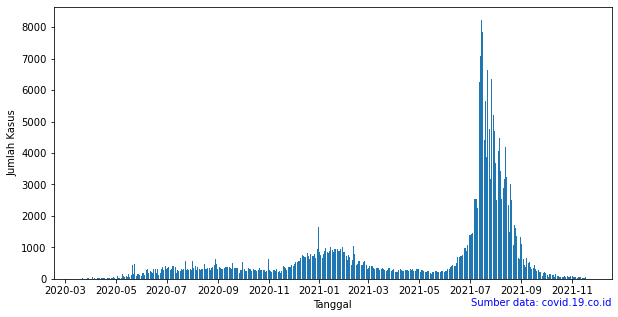

In [81]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.clf()
fig,ax = plt.subplots(figsize=(10,5))
ax.bar(data=covid_jatim_df, x="tanggal", height="kasus baru")
ax.set(xlabel = "Tanggal", ylabel="Jumlah Kasus")
ax.text(1, -0.1,'Sumber data: covid.19.co.id', color='blue',
        ha='right', transform=ax.transAxes)
plt.show()

## Analisis Kasus Harian COVID-19 di Jawa Timur

<Figure size 432x288 with 0 Axes>

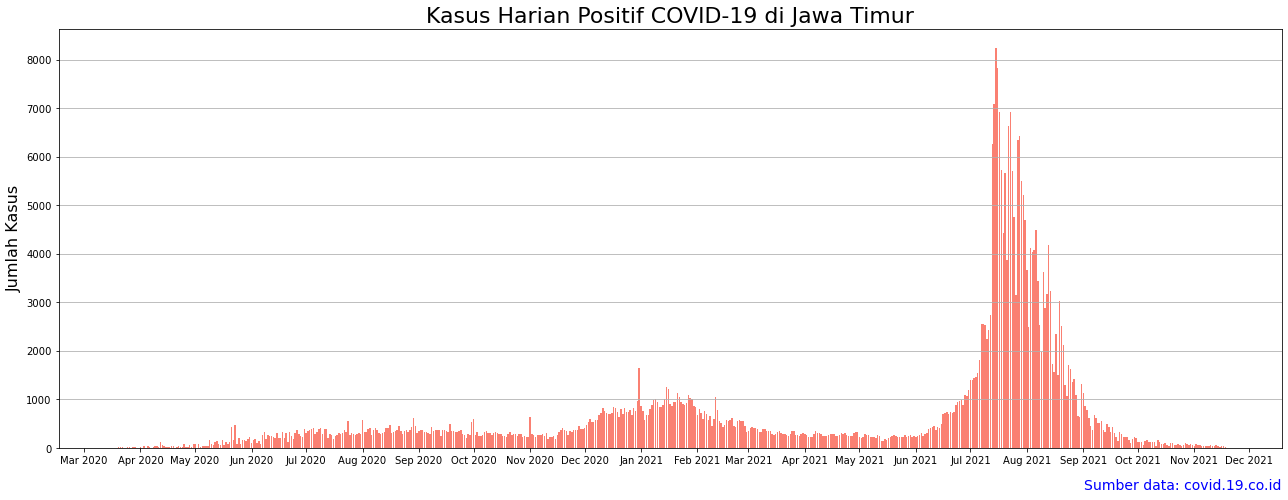

In [103]:
plt.clf()
fig,ax = plt.subplots(figsize=(18,7))
ax.bar(data=covid_jatim_df, x='tanggal', height='kasus baru', color='salmon')
ax.set_title("Kasus Harian Positif COVID-19 di Jawa Timur", fontsize=22)
ax.set_ylabel("Jumlah Kasus", fontsize=16)
ax.set(xlabel=" ")
ax.text(1, -0.1,'Sumber data: covid.19.co.id', color='blue',
        ha='right', transform=ax.transAxes, fontsize=14)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

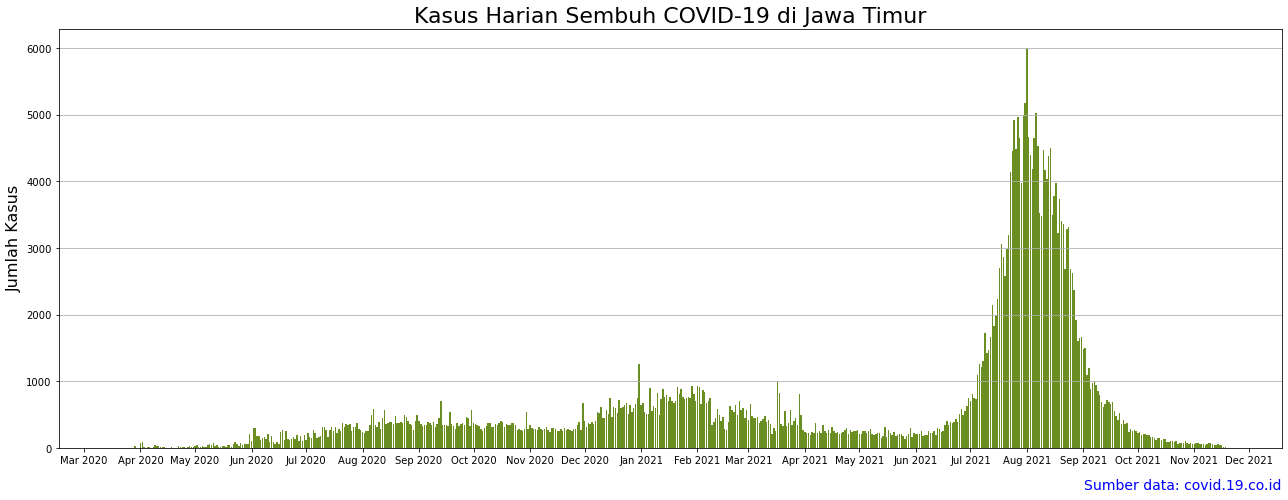

In [102]:
plt.clf()
fig,ax = plt.subplots(figsize=(18,7))
ax.bar(data=covid_jatim_df, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title("Kasus Harian Sembuh COVID-19 di Jawa Timur", fontsize=22)
ax.set_ylabel("Jumlah Kasus", fontsize=16)
ax.set(xlabel=" ")
ax.text(1, -0.1,'Sumber data: covid.19.co.id', color='blue',
        ha='right', transform=ax.transAxes, fontsize=14)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

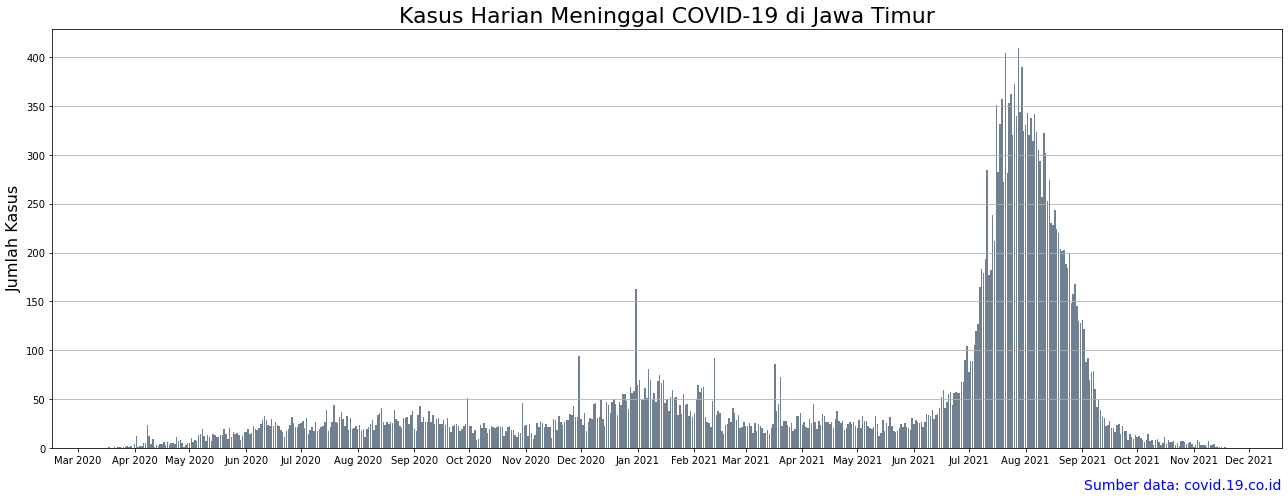

In [101]:
plt.clf()
fig,ax = plt.subplots(figsize=(18,7))
ax.bar(data=covid_jatim_df, x='tanggal', height='meninggal', color='slategrey')
ax.set_title("Kasus Harian Meninggal COVID-19 di Jawa Timur", fontsize=22)
ax.set_ylabel("Jumlah Kasus", fontsize=16)
ax.set(xlabel=" ")
ax.text(1, -0.1,'Sumber data: covid.19.co.id', color='blue',
        ha='right', transform=ax.transAxes, fontsize=14)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Analisis Kasus Pekanan COVID-19 di Jawa Timur

In [66]:
covid_jatim_pekanan = (covid_jatim_df.set_index('tanggal')['kasus baru'].resample('W').sum().reset_index().rename(columns={'kasus baru':'jumlah'}))
covid_jatim_pekanan['tahun'] = covid_jatim_pekanan['tanggal'].apply(lambda x:x.year)
covid_jatim_pekanan['pekan_ke'] = covid_jatim_pekanan['tanggal'].apply(lambda x:x.weekofyear)
covid_jatim_pekanan = covid_jatim_pekanan[['tahun','pekan_ke','jumlah']]
covid_jatim_pekanan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     88 non-null     int64
 1   pekan_ke  88 non-null     int64
 2   jumlah    88 non-null     int64
dtypes: int64(3)
memory usage: 2.2 KB


In [67]:
covid_jatim_pekanan.head()

,tahun,pekan_ke,jumlah
0,2020,12,42
1,2020,13,56
2,2020,14,104
3,2020,15,221
4,2020,16,213


In [70]:
covid_jatim_pekanan['jumlah_pekan_lalu'] = covid_jatim_pekanan['jumlah'].shift().replace(np.nan,0).astype(np.int)
covid_jatim_pekanan['lebih_baik'] = covid_jatim_pekanan['jumlah'] < covid_jatim_pekanan['jumlah_pekan_lalu']
covid_jatim_pekanan

<ipython-input-70-6c78dd13b976>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  covid_jatim_pekanan['jumlah_pekan_lalu'] = covid_jatim_pekanan['jumlah'].shift().replace(np.nan,0).astype(np.int)


,tahun,pekan_ke,jumlah,jumlah_pekan_lalu,lebih_baik
0,2020,12,42,0,False
1,2020,13,56,42,False
2,2020,14,104,56,False
3,2020,15,221,104,False
4,2020,16,213,221,True
...,...,...,...,...,...
83,2021,42,487,656,True
84,2021,43,439,487,True
85,2021,44,365,439,True
86,2021,45,297,365,True


<Figure size 432x288 with 0 Axes>

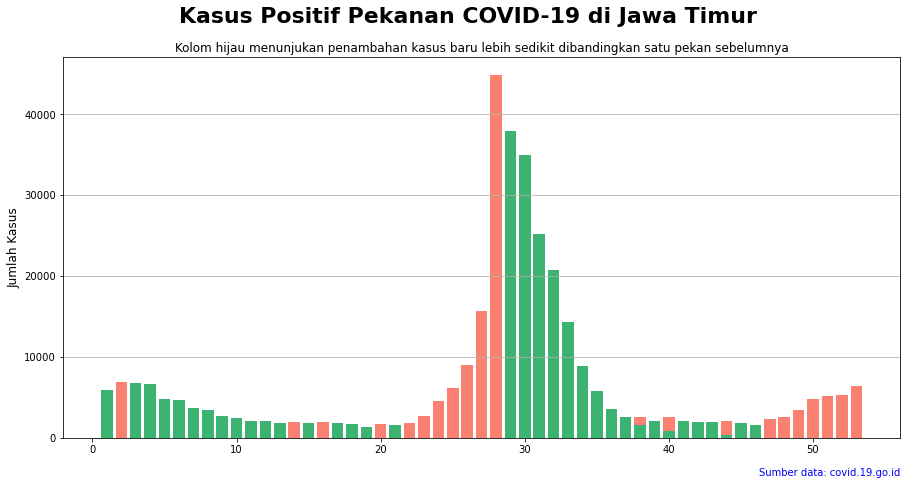

In [92]:
plt.clf()
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(data=covid_jatim_pekanan, x='pekan_ke', height='jumlah', color=['mediumseagreen' if x is True else 'salmon' for x in covid_jatim_pekanan['lebih_baik']])
fig.suptitle('Kasus Positif Pekanan COVID-19 di Jawa Timur', fontsize=22, fontweight='bold', ha='center')
ax.set_title('Kolom hijau menunjukan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya', fontsize=12)
ax.set_ylabel('Jumlah Kasus', fontsize=12)
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue', ha ='right', transform=ax.transAxes)  
plt.grid(axis='y')
plt.show()


## Analisis Kasus Aktif COVID-19 Saat Ini

In [84]:
covid_jatim_akumulasi = covid_jatim_df[['tanggal']].copy()
covid_jatim_akumulasi['akumulasi_aktif'] =(covid_jatim_df['kasus baru'] - covid_jatim_df['meninggal'] - covid_jatim_df['sembuh']).cumsum()
covid_jatim_akumulasi['akumulasi_sembuh'] = covid_jatim_df['sembuh'].cumsum()
covid_jatim_akumulasi['akumulasi_meninggal'] = covid_jatim_df['meninggal'].cumsum()
covid_jatim_akumulasi.tail()

,tanggal,akumulasi_aktif,akumulasi_sembuh,akumulasi_meninggal
606,2021-11-14,487,368787,29639
607,2021-11-15,464,368835,29640
608,2021-11-16,453,368880,29641
609,2021-11-17,486,368891,29641
610,2021-11-18,488,368909,29642


<Figure size 432x288 with 0 Axes>

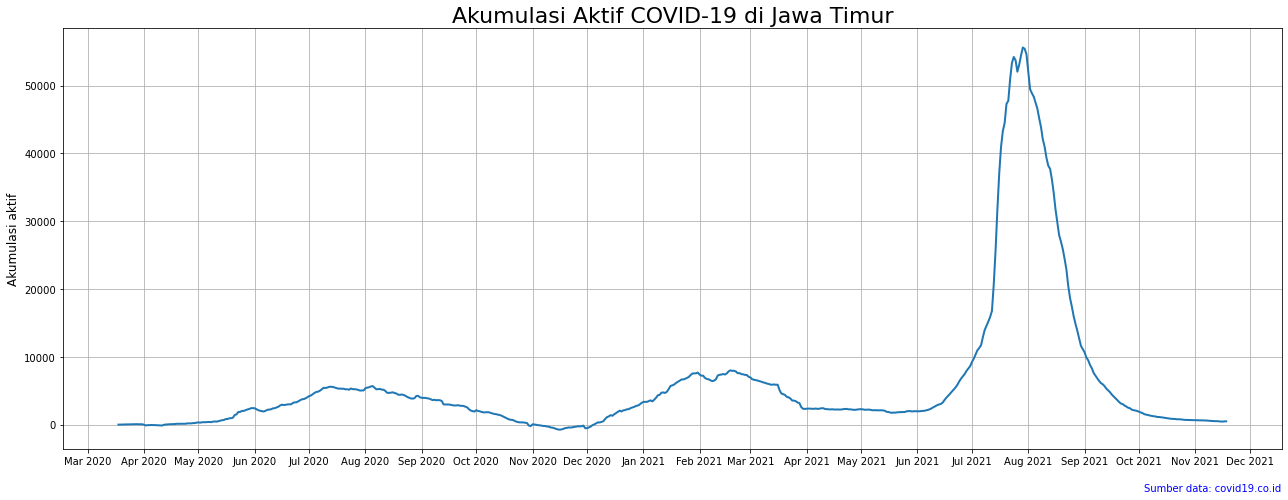

In [104]:
plt.clf()
fig, ax= plt.subplots(figsize=(18,7))
ax.plot('tanggal','akumulasi_aktif', data=covid_jatim_akumulasi, lw=2)
ax.set_title('Akumulasi Aktif COVID-19 di Jawa Timur', fontsize=22)
ax.set_ylabel('Akumulasi aktif', fontsize=12)
ax.text(1, -0.1, 'Sumber data: covid19.co.id', color='blue',ha='right',transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()


<Figure size 432x288 with 0 Axes>

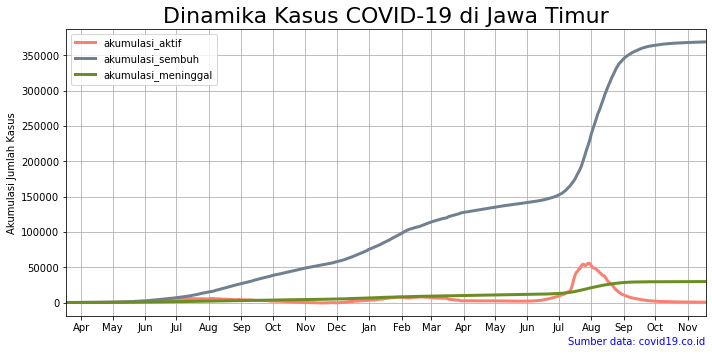

In [112]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
covid_jatim_akumulasi.plot(x='tanggal',lw=3,color=['salmon','slategrey','olivedrab'],ax=ax,kind='line')
ax.set_title('Dinamika Kasus COVID-19 di Jawa Timur', fontsize=22)
ax.set_ylabel('Akumulasi Jumlah Kasus')
ax.set_xlabel('')
ax.text(1, -0.1, 'Sumber data: covid19.co.id', color='blue',ha='right',transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.grid()
plt.tight_layout()
plt.show()